In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from statsmodels.stats.weightstats import ztest

In [3]:
df = pd.read_csv(r"C:\Users\HP-PC\Desktop\Python data analytics\stock dataset\indexProcessed.csv")

In [4]:
df.head()

,Index,Date,Open,High,Low,Close,Adj Close,Volume,CloseUSD
0,HSI,1986-12-31,2568.300049,2568.300049,2568.300049,2568.300049,2568.300049,0.0,333.879006
1,HSI,1987-01-02,2540.100098,2540.100098,2540.100098,2540.100098,2540.100098,0.0,330.213013
2,HSI,1987-01-05,2552.399902,2552.399902,2552.399902,2552.399902,2552.399902,0.0,331.811987
3,HSI,1987-01-06,2583.899902,2583.899902,2583.899902,2583.899902,2583.899902,0.0,335.906987
4,HSI,1987-01-07,2607.100098,2607.100098,2607.100098,2607.100098,2607.100098,0.0,338.923013


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104224 entries, 0 to 104223
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Index      104224 non-null  object 
 1   Date       104224 non-null  object 
 2   Open       104224 non-null  float64
 3   High       104224 non-null  float64
 4   Low        104224 non-null  float64
 5   Close      104224 non-null  float64
 6   Adj Close  104224 non-null  float64
 7   Volume     104224 non-null  float64
 8   CloseUSD   104224 non-null  float64
dtypes: float64(7), object(2)
memory usage: 7.2+ MB


In [12]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume,CloseUSD
count,104224.000000,104224.000000,104224.000000,104224.000000,104224.000000,1.042240e+05,104224.000000
mean,8015.353334,8063.324234,7962.581120,8014.366642,8014.161269,1.347646e+09,3046.729177
std,9140.563404,9196.575802,9082.767802,9140.609758,9140.720456,4.427662e+09,3747.865623
min,54.869999,54.869999,54.869999,54.869999,54.869999,0.000000e+00,10.204900
25%,2046.887756,2057.213990,2037.185943,2047.506470,2047.358490,0.000000e+00,320.460898
50%,5772.140137,5812.764892,5725.199951,5773.710205,5773.710205,9.529000e+05,1371.598486
75%,10487.377445,10552.179690,10416.092287,10488.622560,10488.622560,2.064676e+08,4383.045241
max,68775.062500,69403.750000,68516.992190,68775.062500,68775.062500,9.440374e+10,18934.376173


In [13]:
df.isnull().sum()

Index        0
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
CloseUSD     0
dtype: int64

In [14]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
104219    False
104220    False
104221    False
104222    False
104223    False
Length: 104224, dtype: bool

In [19]:
df.fillna(df.mean(numeric_only=True), inplace=True) 

for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].fillna(df[col].mode()[0]) 


In [20]:
df.drop_duplicates(inplace=True)

In [22]:
print("\nVariance of numerical columns (Before Scaling):\n", df.var(numeric_only=True))
print("\nSkewness (Before Scaling):\n", df.skew(numeric_only=True))
print("\nKurtosis (Before Scaling):\n", df.kurt(numeric_only=True))


Variance of numerical columns (Before Scaling):
 Open         8.354990e+07
High         8.457701e+07
Low          8.249667e+07
Close        8.355075e+07
Adj Close    8.355277e+07
Volume       1.960419e+19
CloseUSD     1.404650e+07
dtype: float64

Skewness (Before Scaling):
 Open         2.837045
High         2.838091
Low          2.840414
Close        2.838991
Adj Close    2.838934
Volume       5.088388
CloseUSD     1.465688
dtype: float64

Kurtosis (Before Scaling):
 Open         10.843693
High         10.855696
Low          10.866937
Close        10.859568
Adj Close    10.859167
Volume       33.803302
CloseUSD      1.270833
dtype: float64


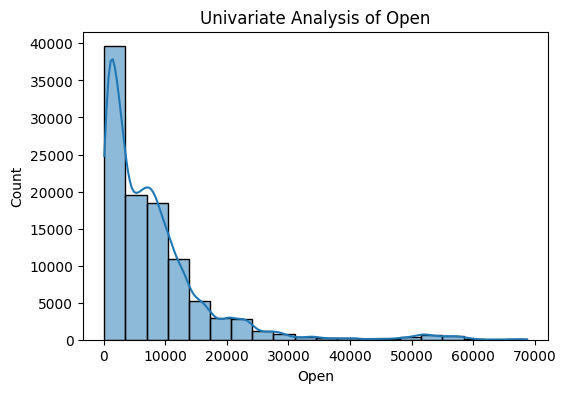

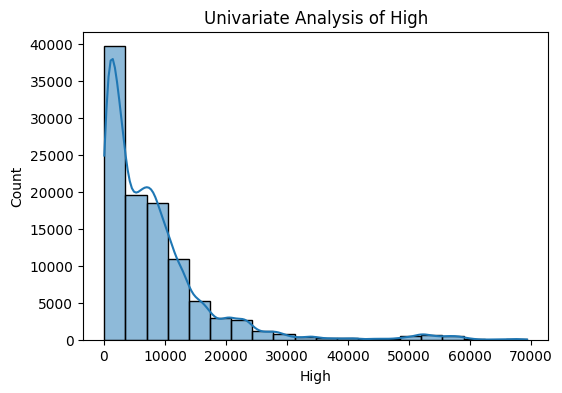

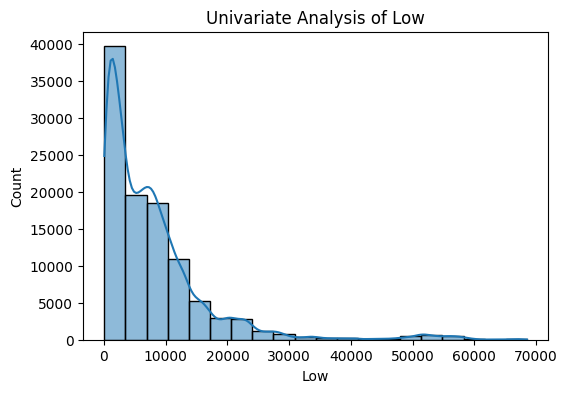

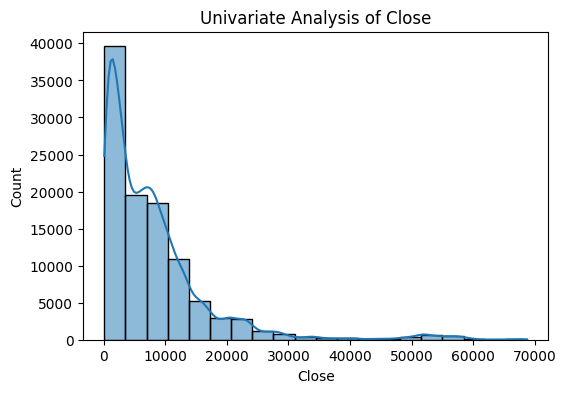

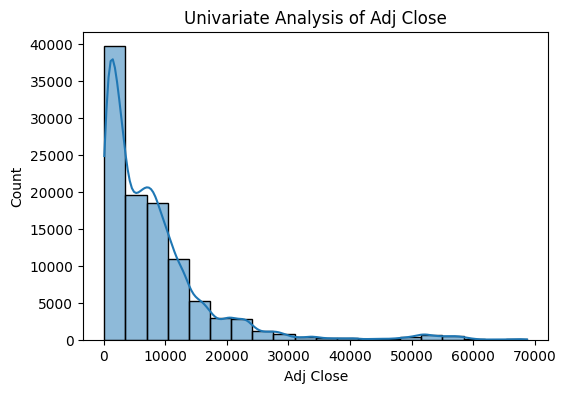

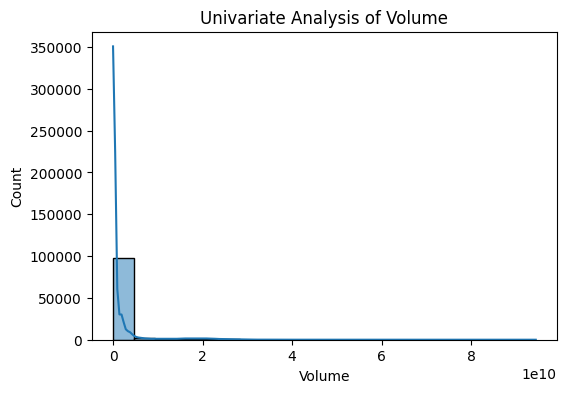

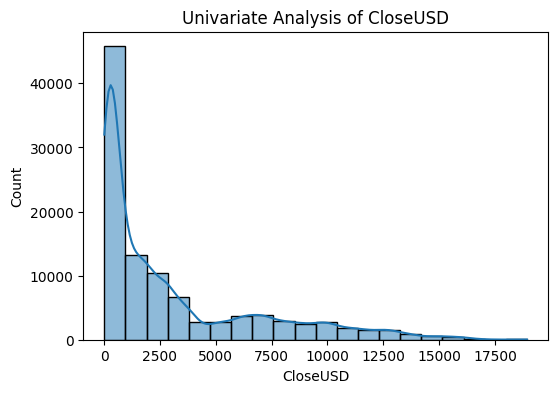

In [23]:
for col in df.select_dtypes(include=['number']).columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f"Univariate Analysis of {col}")
    plt.show()

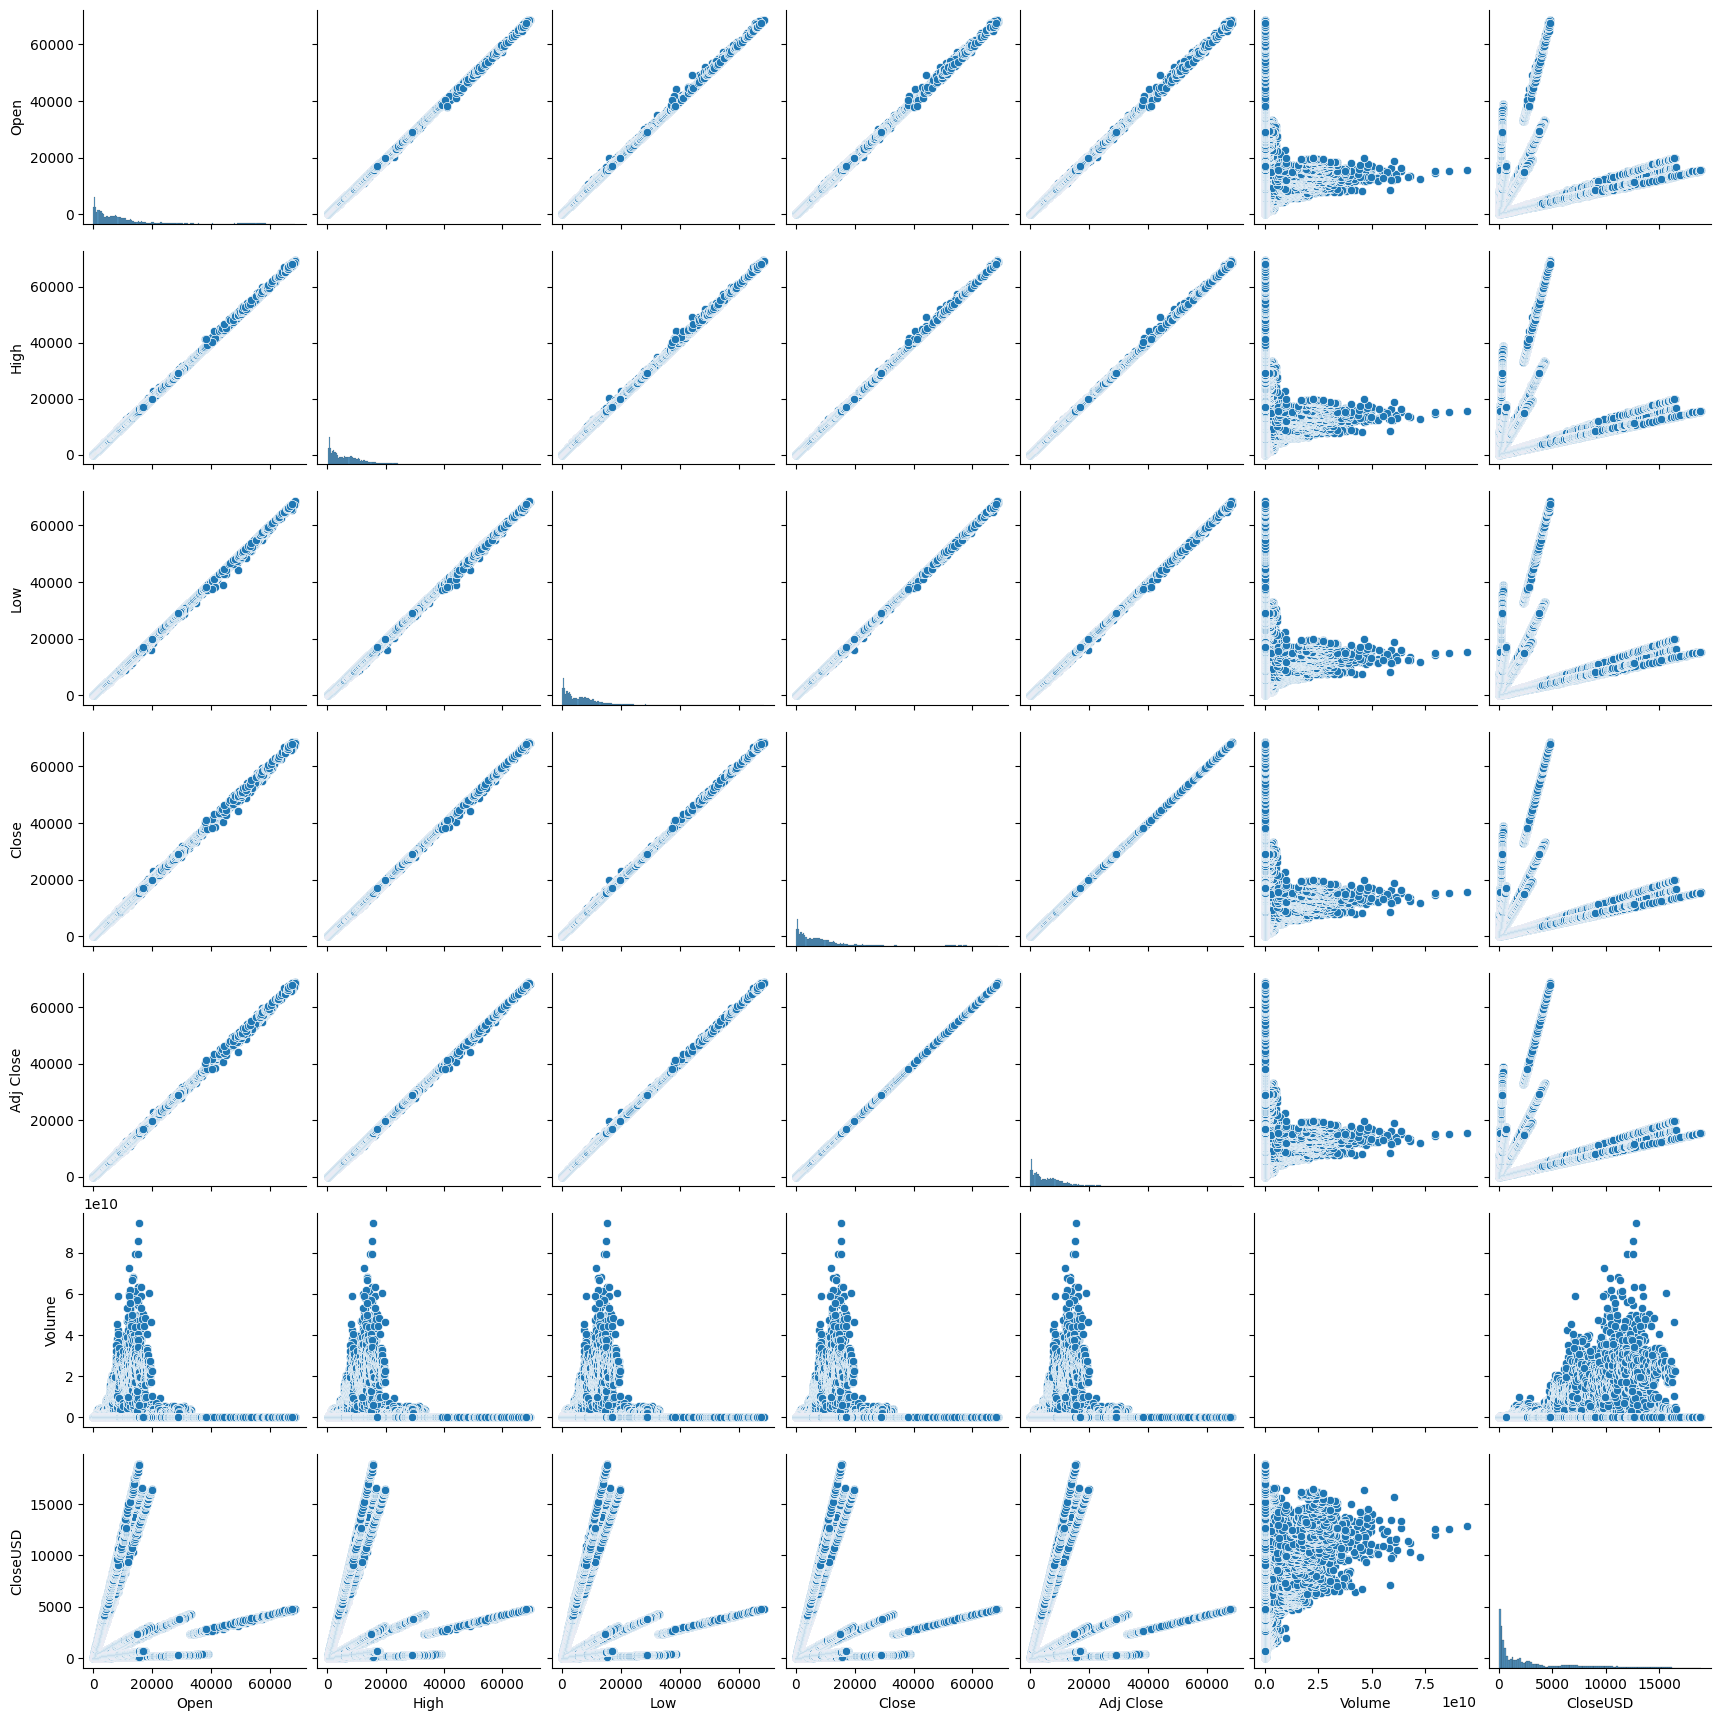

In [24]:
sns.pairplot(df.select_dtypes(include=['number']))
plt.show()

In [25]:
corr_matrix = df.corr(numeric_only=True)
print("\nCorrelation Matrix:\n", corr_matrix)



Correlation Matrix:
                Open      High       Low     Close  Adj Close    Volume  \
Open       1.000000  0.999958  0.999942  0.999904   0.999904  0.129090   
High       0.999958  1.000000  0.999929  0.999954   0.999954  0.128926   
Low        0.999942  0.999929  1.000000  0.999958   0.999958  0.128964   
Close      0.999904  0.999954  0.999958  1.000000   1.000000  0.128971   
Adj Close  0.999904  0.999954  0.999958  1.000000   1.000000  0.128976   
Volume     0.129090  0.128926  0.128964  0.128971   0.128976  1.000000   
CloseUSD   0.187904  0.187606  0.188190  0.187979   0.187980  0.506375   

           CloseUSD  
Open       0.187904  
High       0.187606  
Low        0.188190  
Close      0.187979  
Adj Close  0.187980  
Volume     0.506375  
CloseUSD   1.000000  


In [26]:
numeric_cols = df.select_dtypes(include=['number']).columns
if len(numeric_cols) >= 2:
    t_stat, p_value = stats.ttest_ind(df[numeric_cols[0]], df[numeric_cols[1]])
    print(f"\nT-test between {numeric_cols[0]} and {numeric_cols[1]}: t-stat={t_stat:.4f}, p-value={p_value:.4f}")


T-test between Open and High: t-stat=-1.1944, p-value=0.2323


In [27]:
z_stat, z_p_value = ztest(df[numeric_cols[0]], df[numeric_cols[1]])
print(f"\nZ-test between {numeric_cols[0]} and {numeric_cols[1]}: Z-stat={z_stat:.4f}, p-value={z_p_value:.4f}")


Z-test between Open and High: Z-stat=-1.1944, p-value=0.2323


In [28]:
anova_p_value = stats.f_oneway(*[df[col] for col in numeric_cols])
print(f"\nANOVA Test P-value: {anova_p_value.pvalue:.4f}")


ANOVA Test P-value: 0.0000


In [29]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df.select_dtypes(include=['number']))
print("\nPCA Explained Variance Ratio:\n", pca.explained_variance_ratio_)


PCA Explained Variance Ratio:
 [1.00000000e+00 2.09638187e-11]


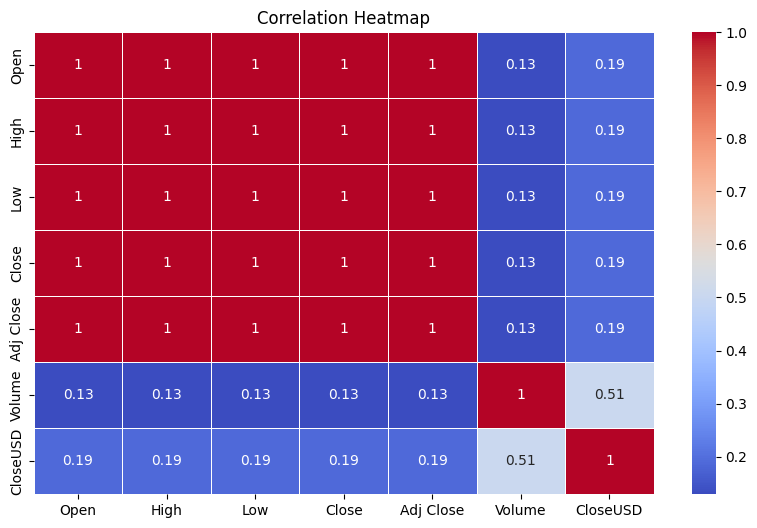

In [30]:
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

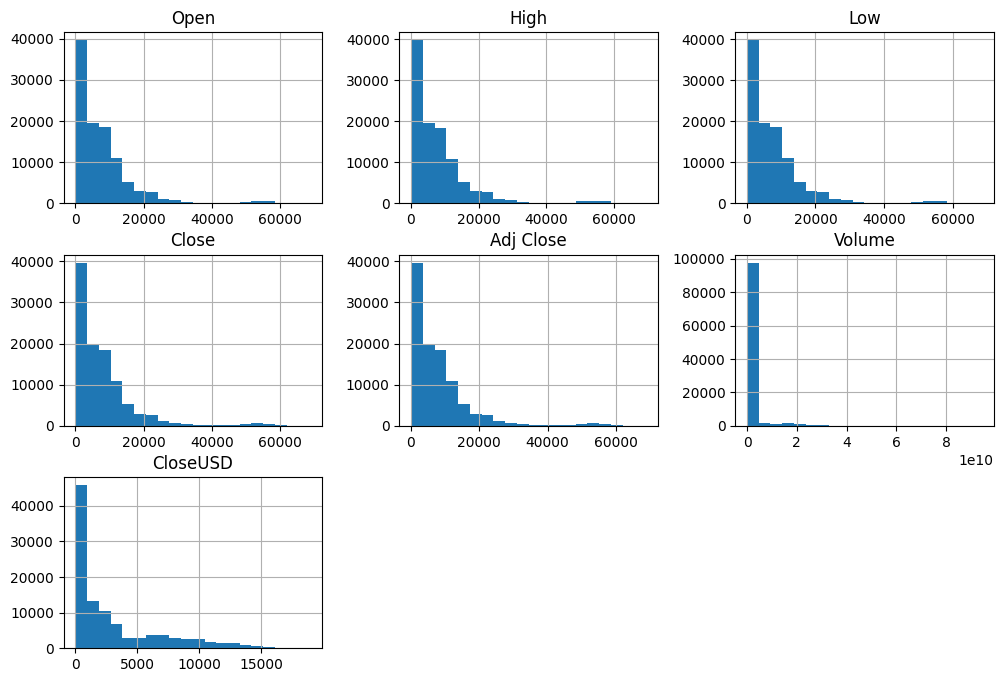

In [31]:
df.hist(figsize=(12, 8), bins=20)
plt.show()

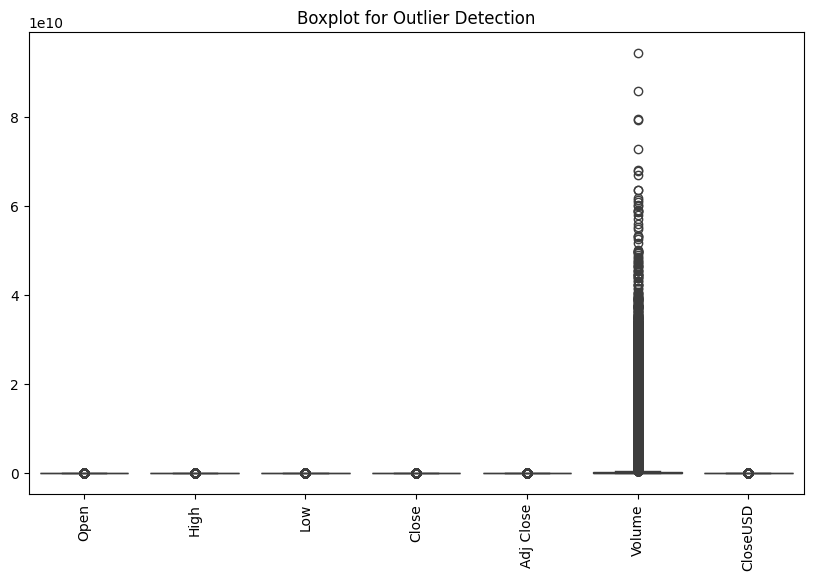

In [32]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.select_dtypes(include=['number']))
plt.xticks(rotation=90)
plt.title("Boxplot for Outlier Detection")
plt.show()

In [33]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df.select_dtypes(include=['number'])), columns=numeric_cols)

In [34]:
print("\nVariance after Scaling:\n", df_scaled.var())
print("\nSkewness after Scaling:\n", df_scaled.skew())
print("\nKurtosis after Scaling:\n", df_scaled.kurt())


Variance after Scaling:
 Open         1.00001
High         1.00001
Low          1.00001
Close        1.00001
Adj Close    1.00001
Volume       1.00001
CloseUSD     1.00001
dtype: float64

Skewness after Scaling:
 Open         2.837045
High         2.838091
Low          2.840414
Close        2.838991
Adj Close    2.838934
Volume       5.088388
CloseUSD     1.465688
dtype: float64

Kurtosis after Scaling:
 Open         10.843693
High         10.855696
Low          10.866937
Close        10.859568
Adj Close    10.859167
Volume       33.803302
CloseUSD      1.270833
dtype: float64


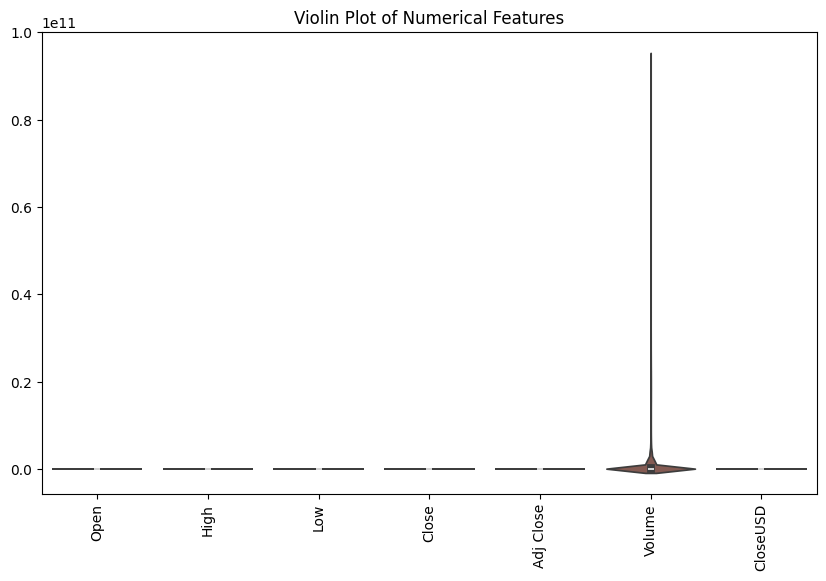

In [35]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df.select_dtypes(include=['number']))
plt.xticks(rotation=90)
plt.title("Violin Plot of Numerical Features")
plt.show()

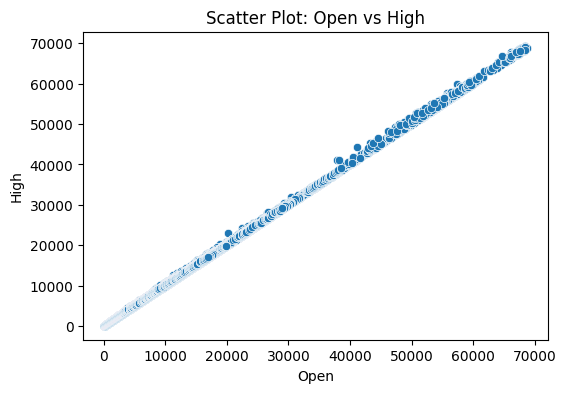

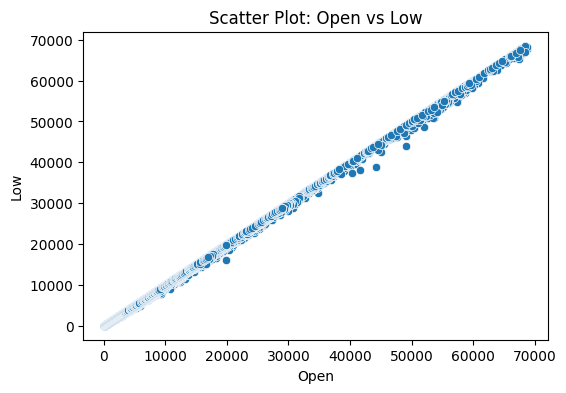

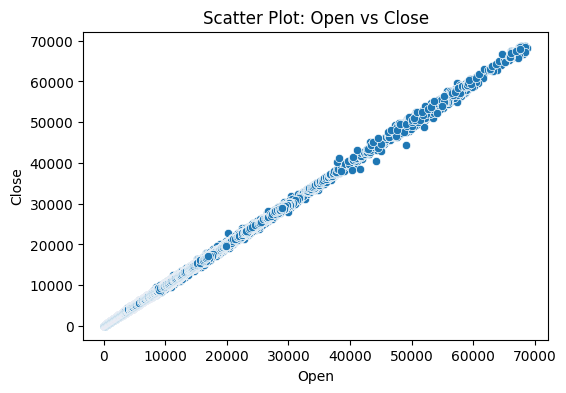

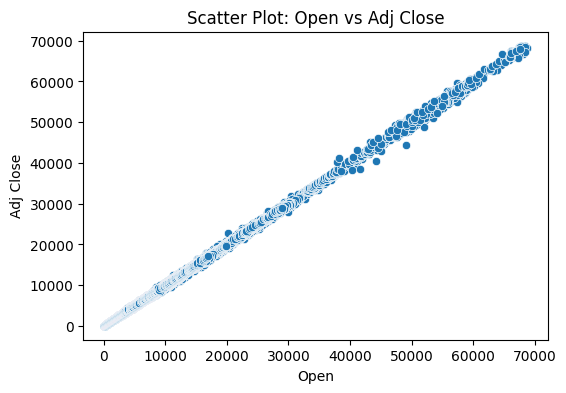

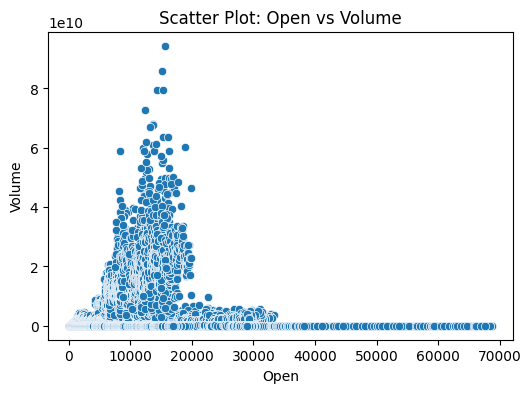

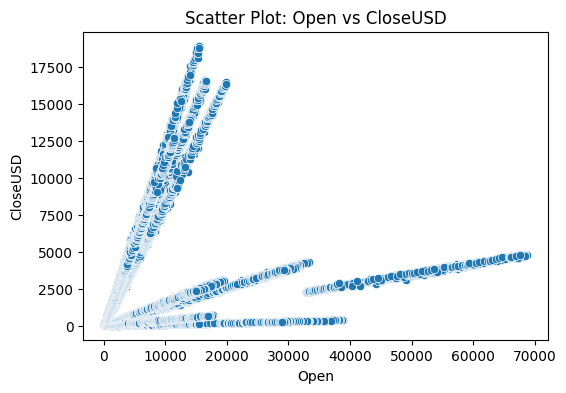

In [36]:
for col in numeric_cols[1:]:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=df[numeric_cols[0]], y=df[col])
    plt.title(f"Scatter Plot: {numeric_cols[0]} vs {col}")
    plt.show()

In [37]:
minmax_scaler = MinMaxScaler()
df_minmax_scaled = pd.DataFrame(minmax_scaler.fit_transform(df.select_dtypes(include=['number'])), columns=numeric_cols)


In [38]:
print("\nVariance after Min-Max Scaling:\n", df_minmax_scaled.var())
print("\nSkewness after Min-Max Scaling:\n", df_minmax_scaled.skew())
print("\nKurtosis after Min-Max Scaling:\n", df_minmax_scaled.kurt())


Variance after Min-Max Scaling:
 Open         0.017692
High         0.017586
Low          0.017601
Close        0.017692
Adj Close    0.017693
Volume       0.002200
CloseUSD     0.039222
dtype: float64

Skewness after Min-Max Scaling:
 Open         2.837045
High         2.838091
Low          2.840414
Close        2.838991
Adj Close    2.838934
Volume       5.088388
CloseUSD     1.465688
dtype: float64

Kurtosis after Min-Max Scaling:
 Open         10.843693
High         10.855696
Low          10.866937
Close        10.859568
Adj Close    10.859167
Volume       33.803302
CloseUSD      1.270833
dtype: float64


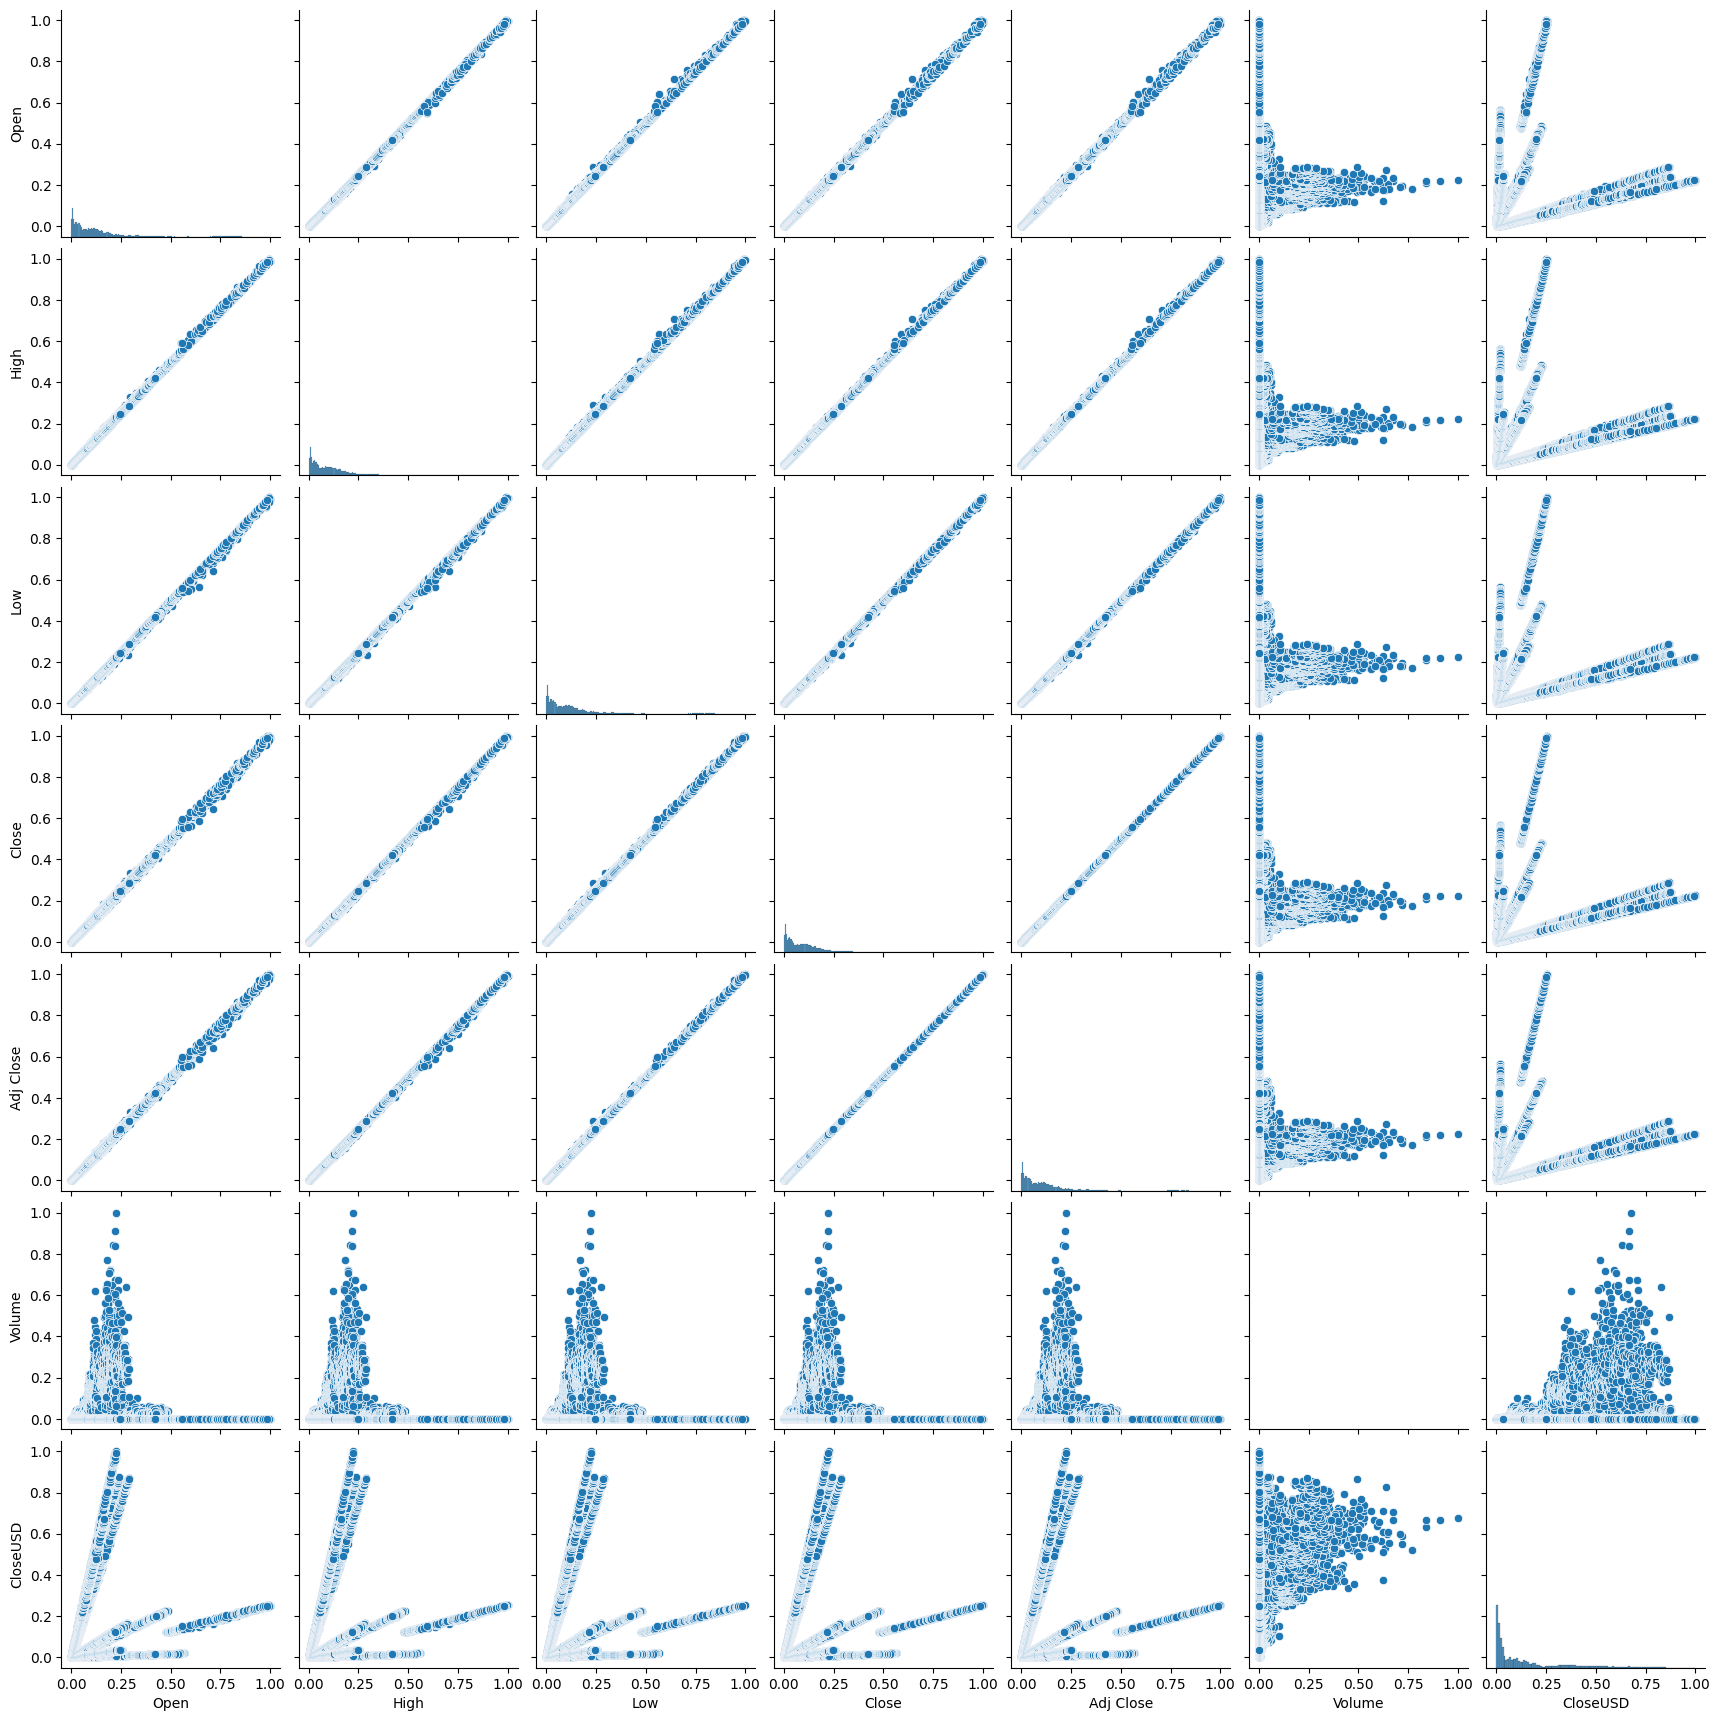

In [39]:
sns.pairplot(df_minmax_scaled)
plt.show()